# Setup

In [1]:
from IPython.display import clear_output

# Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data
from ucimlrepo import fetch_ucirepo

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# Cross Validation
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit, train_test_split

In [2]:
%matplotlib inline

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 4)

# Datasets

## Adult Dataset

In [3]:
# Fetch dataset 
adult = fetch_ucirepo(id=2)

# Combine into one DataFrame
adult_raw_df = pd.concat([adult.data.features, adult.data.targets], axis=1)
adult_raw_df.shape

(48842, 15)

In [4]:
# Cleaning

print("# of N/A in each column:\n", adult_raw_df.isna().sum(), sep='')

# Very few missing values, so we can drop them
adult_df = adult_raw_df.dropna(how='any')

print("\n# of N/A after:", adult_df.isna().sum().sum())

print("\nIncome Before:\n", adult_df['income'].unique(), sep='')

# Convert income to binary, and fix the formatting
adult_df.loc[:, 'income'] = adult_df['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})

print("\nAfter:\n", adult_df['income'].value_counts(), sep='')

# Fix Types
adult_df = adult_df.convert_dtypes()

# One Hot Encoding, drop first since we only need n-1 columns to represent n categories
adult_df = pd.get_dummies(adult_df, drop_first=True, dtype=int)

# of N/A in each column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# of N/A after: 0

Income Before:
['<=50K' '>50K' '<=50K.' '>50K.']

After:
income
0    36080
1    11541
Name: count, dtype: int64


In [5]:
adult_train_X, adult_test_X, adult_train_y, adult_test_y = train_test_split(adult_df.drop(columns='income'), adult_df.income, train_size=10000, shuffle=True, random_state=42)

print("Training set shape:", adult_train_X.shape)
print("Testing set shape:", adult_test_X.shape)

adult_train_X

Training set shape: (10000, 100)
Testing set shape: (37621, 100)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
11292,51,29580,7,4386,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
39526,28,490332,13,3103,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
36629,42,173628,13,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39291,28,162501,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
19669,19,140459,7,0,0,25,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,200117,13,0,1887,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45701,47,849067,8,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38628,28,251905,14,0,0,42,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
860,18,216284,7,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Bank Marketing Dataset

In [6]:
# Fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

# Combine into one DataFrame
mark_raw_df = pd.concat([bank_marketing.data.features, bank_marketing.data.targets], axis=1)
mark_raw_df.shape

(45211, 17)

In [7]:
# Cleaning

print("# of N/A in each column:\n", mark_raw_df.isna().sum(), sep='')

# N/A in these columns indicates unknown; it is a small enough subset that we can drop them
mark_df = mark_raw_df.dropna(subset=['job', 'education', 'contact'])

# N/A indicates no previous marketing campaign
mark_df.loc[:, 'poutcome'] =  mark_df['poutcome'].fillna('none')

print("\n# of N/A after:", mark_df.isna().sum().sum())

# Map yes/no to 1/0
mark_df.loc[:, 'y'] = mark_df['y'].map({'no': 0, 'yes': 1}).astype('int')

# Fix Types
mark_df = mark_df.convert_dtypes()

# One Hot Encoding, drop first since we only need n-1 columns to represent n categories
mark_df = pd.get_dummies(mark_df, drop_first=True, dtype=int)

# of N/A in each column:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

# of N/A after: 0


In [8]:
mark_train_X, mark_test_X, mark_train_y, mark_test_y = train_test_split(mark_df.drop(columns='y'), mark_df.y, train_size=10000, shuffle=True, random_state=42)

print("Training set shape:", mark_train_X.shape)
print("Testing set shape:", mark_test_X.shape)

mark_train_X

Training set shape: (10000, 39)
Testing set shape: (20907, 39)


,age,balance,day_of_week,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_none,poutcome_other,poutcome_success
21842,54,194,20,127,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
19232,59,0,6,142,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36358,29,558,11,142,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
26151,33,1631,20,366,6,-1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
32564,29,770,17,341,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43822,29,8103,28,473,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
18268,34,82,31,134,5,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13560,37,1146,9,80,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29125,30,267,2,124,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
mark_df.y.value_counts()

y
0    26394
1     4513
Name: count, dtype: Int64

## CDC Diabetes Dataset

In [10]:
# Fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

# Combine into one DataFrame
diab_df = pd.concat([cdc_diabetes_health_indicators.data.features, cdc_diabetes_health_indicators.data.targets], axis=1)

# Doesn't need cleaning
print("\n# of N/A:", diab_df.isna().sum().sum())


# of N/A: 0


In [11]:
diab_train_X, diab_test_X, diab_train_y, diab_test_y = train_test_split(diab_df.iloc[:, :-1], diab_df.Diabetes_binary, train_size=10000, shuffle=True, random_state=42)

print("Training set shape:", diab_train_X.shape)
print("Testing set shape:", diab_test_X.shape)

diab_train_X

Training set shape: (10000, 21)
Testing set shape: (243680, 21)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
57388,1,1,1,44,1,0,0,1,1,0,...,1,0,3,4,10,0,0,10,6,7
139677,0,1,1,27,0,0,0,1,1,1,...,1,0,3,5,15,0,0,9,4,7
65938,0,0,1,28,1,0,0,1,1,1,...,1,0,3,0,0,0,1,8,4,8
37196,0,0,1,26,1,0,1,0,1,1,...,1,0,1,0,0,0,1,12,4,6
251397,0,0,1,17,0,0,0,0,1,1,...,1,0,3,30,15,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,0,1,45,1,0,0,1,1,0,...,1,1,1,15,0,0,0,5,4,1
103694,1,1,1,29,1,0,0,1,0,1,...,1,0,3,0,0,0,1,11,6,7
131932,0,1,1,25,0,0,0,1,1,1,...,1,0,2,0,3,0,0,9,6,8
146867,0,0,0,23,0,0,0,0,1,1,...,1,1,2,0,0,0,0,5,6,6


In [12]:
diab_df.Diabetes_binary.value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

## CAPE Dataset
For information on how this was collected and processed, see [my COGS 108 Final Project](https://github.com/COGS108/Group_014-Fa22/blob/master/FinalProjectGroup_014-Fa22.ipynb). The loaded CSV has only been through the steps described in the Data Cleaning section, and has not had missing or unlikely values removed.

This has been turned into a classification problem, by making the positive class Engineering courses.

In [13]:
# load dataset 
cape_raw_df = pd.read_csv('data/courses.csv')
cape_raw_df.shape

(28152, 17)

In [14]:
# Cleaning

print("# of N/A in each column:\n", cape_raw_df.isna().sum(), sep='')

# There are very few N/As, so we can drop them
cape_df = cape_raw_df.dropna(how='any')

# Remove the outlier received grades (all 0s)
cape_df = cape_df[cape_df['received_grade'] != 0]

# Remove irrelevant columns, as well as evals which is covered by enroll + eval rate
cape_df = cape_df.drop(columns=['course', 'term', 'section', 'evals'])

print("\n# of N/A after:", cape_df.isna().sum().sum())

# Based on this page https://jacobsschool.ucsd.edu/academics/undergraduate-majors
# Does not include ENG because those courses are general education, not engineering
eng = ['BENG', 'CENG', 'CSE', 'ECE', 'MAE', 'NANO', 'SE']

cape_df.loc[:, 'dept'] = cape_df['dept'].map(lambda x: 1 if x in eng else 0)

print("\nDepartment After:\n", cape_df['dept'].value_counts(), sep='')

# Fix Types
cape_df = cape_df.convert_dtypes()

# of N/A in each column:
dept                 0
course               0
term                 0
section              0
rec_course           0
rec_inst             0
eval_rate            0
enroll               0
evals                0
expected_grade     446
received_grade    4193
study_wk             0
difficulty         901
amount_learned     901
attendance         901
start              238
duration           238
dtype: int64

# of N/A after: 0

Department After:
dept
0    19161
1     3572
Name: count, dtype: int64


In [15]:
cape_train_X, cape_test_X, cape_train_y, cape_test_y = train_test_split(cape_df.iloc[:, 1:], cape_df.dept, train_size=10000, shuffle=True, random_state=42)

print("Training set shape:", cape_train_X.shape)
print("Testing set shape:", cape_test_X.shape)

cape_train_X

Training set shape: (10000, 12)
Testing set shape: (12733, 12)


,rec_course,rec_inst,eval_rate,enroll,expected_grade,received_grade,study_wk,difficulty,amount_learned,attendance,start,duration
24090,0.69,0.69,0.4815,27,3.55,3.57,3.73,3.46,3.64,3.0,12.5,1.3333
11008,0.93,0.93,0.3947,38,3.25,2.85,3.36,4.0,4.08,2.86,15.5,1.3333
8497,0.75,0.39,0.4265,68,3.32,3.72,4.43,3.5,3.43,2.89,14.0,1.3333
27476,1.0,1.0,0.4545,22,3.89,3.9,6.0,3.0,4.86,3.0,15.0,2.8333
11456,0.86,0.8,0.5308,130,3.2,2.62,5.98,4.08,3.98,2.81,11.0,0.8333
...,...,...,...,...,...,...,...,...,...,...,...,...
15138,0.92,1.0,0.3421,38,3.55,3.5,5.12,3.69,4.77,2.85,10.0,0.8333
26651,1.0,1.0,0.2778,18,3.4,3.7,6.1,3.0,4.4,3.0,14.0,1.3333
6913,0.87,0.95,0.3568,185,3.32,2.82,8.91,4.31,4.53,2.73,10.0,0.8333
985,0.88,0.91,0.9524,105,3.12,3.01,6.42,3.83,4.14,2.56,17.0,1.3333


# Model Comparison

In [16]:
try:
    result_grid = pd.read_csv('data/result_grid.csv', index_col=[0, 1, 2])
except:
    classifiers = {
        'DT': DecisionTreeClassifier(random_state=42),
        'BAG': BaggingClassifier(random_state=42),
        'BST': XGBClassifier(random_state=42),
        'RF': RandomForestClassifier(random_state=42),
    }

    clf_params = {
        'DT': { 'ccp_alpha': [0, 0.005, 0.01, 0.02, 0.04], 'criterion': ['gini', 'entropy'] },
        'BAG': { 'n_estimators': [32, 128, 512, 1024] },
        'BST': { 'n_estimators': [4, 16, 64, 256, 1024], 'learning_rate': [ 0.1, 0.3, 0.5, 1 ] }, 
        'RF': { 'n_estimators': [32, 128, 512, 1024], 'max_features': ['sqrt', 'log2', 1, 2, 4, 8, 16] }
    }

    datasets = {
        'ADULT': (adult_train_X, adult_train_y, adult_test_X, adult_test_y),
        'MARK': (mark_train_X, mark_train_y, mark_test_X, mark_test_y),
        'DIAB': (diab_train_X, diab_train_y, diab_test_X, diab_test_y),
        'CAPE': (cape_train_X, cape_train_y, cape_test_X, cape_test_y),
    }

    splitters = {
        '20/80': ShuffleSplit(n_splits=3, train_size=0.2, random_state=42), # 20/80
        '50/50': ShuffleSplit(n_splits=3, train_size=0.5, random_state=42), # 50/50
        '80/20': ShuffleSplit(n_splits=3, train_size=0.8, random_state=42), # 80/20
        '5-fold': KFold(n_splits=5, shuffle=True, random_state=42), # 5-fold CV (better overlap in training)
    }

    ind = pd.MultiIndex.from_product([['DT', 'BAG', 'BST', 'RF'], ['ADULT', 'MARK', 'DIAB', 'CAPE'], ['20/80', '50/50', '80/20', '5-fold']]).sort_values()

    result_grid = pd.DataFrame(index=ind, columns=['train', 'valid', 'test'])

    for clf_type, clf in classifiers.items():
        for data_type, (train_X, train_y, test_X, test_y) in datasets.items():
            for split_type, splitter in splitters.items():
                grid = GridSearchCV(
                    estimator=clf, # Uses our given classifier for this grid search
                    param_grid=clf_params[clf_type], # Goes through the cartesian product of the given parameter arrays
                    cv=splitter, # Uses the given splitter for cross validation
                    verbose=4, # To verify the search is making progress
                    n_jobs=-1, # Use all available CPU cores, to speed this up
                    return_train_score=True # Return the training scores for reporting
                ).fit(train_X, train_y)

                result_grid.loc[(clf_type, data_type, split_type), 'train'] = grid.cv_results_['mean_train_score'][grid.best_index_]
                result_grid.loc[(clf_type, data_type, split_type), 'valid'] = grid.best_score_
                result_grid.loc[(clf_type, data_type, split_type), 'test'] = grid.score(test_X, test_y)

                # Clear the output to keep the notebook clean (and the output readable)
                clear_output()

    result_grid.to_csv('data/result_grid.csv')

In [17]:
result_grid.groupby(level=[1, 2]).mean().sort_values(by='test', ascending=False)

train   valid    test
CAPE  5-fold  0.9648  0.8898  0.8891
      20/80   0.9641  0.8784  0.8889
      50/50   0.9675  0.8822  0.8886
      80/20   0.9673  0.8900  0.8881
MARK  20/80   0.9610  0.8735  0.8817
      5-fold  0.9499  0.8784  0.8812
      80/20   0.9618  0.8752  0.8809
      50/50   0.9646  0.8750  0.8803
DIAB  20/80   0.9383  0.8597  0.8606
      80/20   0.9347  0.8580  0.8604
      5-fold  0.9329  0.8617  0.8604
      50/50   0.9338  0.8592  0.8602
ADULT 20/80   0.9450  0.8500  0.8543
      80/20   0.9367  0.8581  0.8542
      5-fold  0.9446  0.8585  0.8542
      50/50   0.9383  0.8517  0.8542

In [18]:
result_grid.groupby(level=[0, 2]).mean().sort_values(by='test', ascending=False)

train   valid    test
BST 5-fold  0.9290  0.8793  0.8778
    20/80   0.9359  0.8693  0.8775
    50/50   0.9397  0.8738  0.8773
    80/20   0.9371  0.8790  0.8768
RF  20/80   1.0000  0.8679  0.8740
    5-fold  0.9999  0.8757  0.8733
    50/50   0.9999  0.8701  0.8732
    80/20   0.9999  0.8735  0.8730
BAG 20/80   1.0000  0.8635  0.8720
    80/20   0.9999  0.8695  0.8718
    5-fold  0.9999  0.8715  0.8717
    50/50   0.9999  0.8662  0.8716
DT  20/80   0.8725  0.8609  0.8620
    5-fold  0.8635  0.8619  0.8620
    80/20   0.8637  0.8593  0.8620
    50/50   0.8648  0.8579  0.8611

In [19]:
result_grid.groupby(level=[0, 1]).std().sort_values(by='test', ascending=False)

train   valid        test
DT  MARK   5.2416e-03  0.0035  1.9132e-03
BST CAPE   1.1374e-02  0.0067  1.2192e-03
RF  CAPE   0.0000e+00  0.0070  9.2343e-04
    MARK   0.0000e+00  0.0024  8.2106e-04
BST MARK   2.5513e-02  0.0046  8.0084e-04
BAG CAPE   0.0000e+00  0.0076  5.1048e-04
RF  DIAB   1.9502e-04  0.0022  4.4966e-04
BST DIAB   8.8399e-03  0.0010  3.1331e-04
BAG DIAB   2.0016e-04  0.0020  2.8027e-04
    MARK   0.0000e+00  0.0015  2.2092e-04
RF  ADULT  3.8112e-05  0.0045  1.3290e-04
BST ADULT  1.4583e-02  0.0074  3.9871e-05
BAG ADULT  3.8112e-05  0.0041  3.9871e-05
DT  ADULT  6.2432e-03  0.0034  0.0000e+00
    CAPE   5.6123e-03  0.0025  0.0000e+00
    DIAB   4.5595e-04  0.0012  0.0000e+00

In [20]:
result_grid.groupby(level=[0, 1]).mean().test.unstack(level=1).style.highlight_max(color='green', axis=0)

,ADULT,CAPE,DIAB,MARK
BAG,0.850170,0.896470,0.856329,0.884154
BST,0.866238,0.895115,0.862897,0.885182
DT,0.847931,0.867038,0.860625,0.871574
RF,0.852489,0.895999,0.861816,0.883197


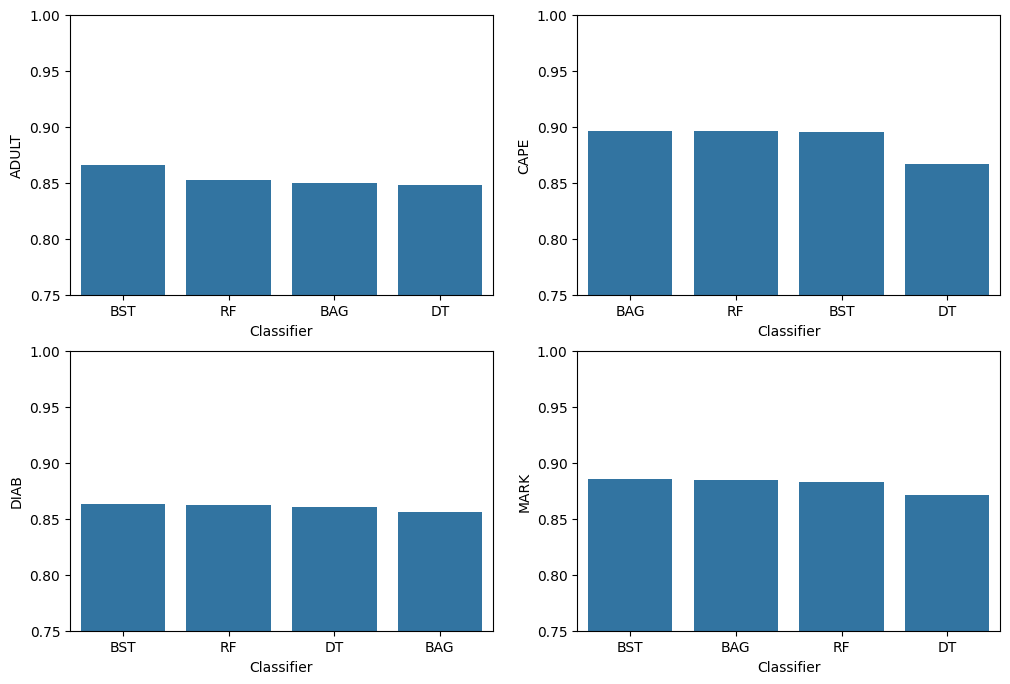

In [24]:
a = result_grid.groupby(level=[0, 1]).mean().test.unstack(level=1).reset_index()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axs.ravel(), a.columns[1:]):
    sns.barplot(ax=ax, data=a.sort_values(by=col, ascending=False), x='index', y=col)
    ax.set_ylim((0.75, 1))
    ax.set_xlabel('Classifier')